In [27]:
import pandas as pd
import os
import glob

### data clean

In [2]:
files_Month = [file for file in os.listdir('../data/sales')] 
files_Month

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
all_sales_data = pd.DataFrame()

for file in files_Month:
    df = pd.read_csv('../data/sales/' + file)
    all_sales_data = pd.concat([all_sales_data, df])  

In [4]:
print(all_sales_data.duplicated)

<bound method DataFrame.duplicated of       Order ID                 Product Quantity Ordered Price Each  \
0       295665      Macbook Pro Laptop                1       1700   
1       295666      LG Washing Machine                1      600.0   
2       295667    USB-C Charging Cable                1      11.95   
3       295668        27in FHD Monitor                1     149.99   
4       295669    USB-C Charging Cable                1      11.95   
...        ...                     ...              ...        ...   
13617   222905  AAA Batteries (4-pack)                1       2.99   
13618   222906        27in FHD Monitor                1     149.99   
13619   222907    USB-C Charging Cable                1      11.95   
13620   222908    USB-C Charging Cable                1      11.95   
13621   222909  AAA Batteries (4-pack)                1       2.99   

           Order Date                        Purchase Address  
0      12/30/19 00:01  136 Church St, New York City, NY 1

In [5]:
sales=all_sales_data.drop_duplicates('Order ID')

In [6]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
sales.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [8]:
sales_data = sales.dropna(how='all')

In [9]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors = 'coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors = 'coerce')
sales_data['Sale'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Month'] = sales_data['Order Date'].dt.month

/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_68512/592014633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors = 'coerce')
/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_68512/592014633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors = 'coerce')
/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_68512/592014633

In [11]:
sales_data['City'] = sales_data['Purchase Address'].str.split(' ').apply(lambda x:x[-2])

In [12]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2.99,6,MA
13618,222906,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",149.99,6,NY
13619,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",11.95,6,CA
13620,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",11.95,6,CA


In [13]:
sales_data.to_csv("../data/Sale_data.csv", index=False)

### create a database connection to a SQLite database

In [5]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    
    return conn

In [6]:
pathToFile = "../code/"
fileName = "final.db"
dbConnection = create_connection(pathToFile + fileName)

In [3]:
if dbConnection:
    dbConnection.close()
    print("Connection closed")

Connection closed


In [17]:
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [21]:
sql_create_sale_table = """CREATE TABLE IF NOT EXISTS sale (
                                Order_ID bigint PRIMARY KEY,
                                Product text,
                                Quantity_Ordered float,
                                Price_Each float,
                                Order_Date text,
                                Purchase_Address text,
                                Sale float,
                                Month integer,
                                City text
                            );"""

In [7]:
pathToFile = "../code/"
fileName = "final.db"
dbConnection = create_connection("final.db")

In [23]:
if dbConnection is not None:
    create_table(dbConnection,sql_create_sale_table)

else:
    print("Error! Cannot create the database connection.")

In [8]:
import numpy as np

In [25]:
sale = pd.read_csv('../data/' + 'Sale_data.csv')
list1=sale.values.tolist()

In [26]:
def create_sale(conn, sale):
    """
    Create a new sale into the sale table
    """
    sql = ''' INSERT INTO sale(Order_ID, Product, Quantity_Ordered, Price_Each, Order_Date, Purchase_Address, Sale, Month, City)
              VALUES(?,?,?,?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql,sale)
    conn.commit()
    return cur.lastrowid

In [27]:
conn=sqlite3.connect("final.db")
print("yes")
c=conn.cursor()
conn.commit()
for i in list1:
    c.execute("INSERT INTO sale VALUES(?,?,?,?,?,?,?,?,?)",i)
    conn.commit()

yes


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
conn=sqlite3.connect("final.db")

In [3]:
def selectsaleofproductindifferentmonth(conn):
    """

    """
    product = input("Please input product:")
    with conn:

        sql = "SELECT Month, Product, sum(SALE) FROM sale WHERE Product = ? GROUP by Month ORDER by Month"
        cur = conn.cursor()
        cur.execute(sql, [product])
        result_set = cur.fetchall()
        month = []
        sale = []
        for row in result_set:
            month.append(row[0])
            sale.append(row[2])
        fig, ax = plt.subplots(1,1, figsize=(18, 6))

        color = sns.color_palette('husl', 12)
        sns.set(font_scale=2) 
        sns.barplot(month, sale, palette = color,ax=ax)
        ax.set(xlabel='Month', ylabel='Sale(1 million)', title='Sale for Every Month: ' + product)

In [4]:
selectsaleofproductindifferentmonth(conn)

NameError: name 'conn' is not defined

In [9]:
def selectQuantityOrderedofproductindifferentmonth(conn):
    """

    """
    product = input("Please input product:")
    with conn:

        sql = "SELECT Month, Product, sum(Quantity_Ordered) FROM sale WHERE Product = ? GROUP by Month ORDER by Month"
        cur = conn.cursor()
        cur.execute(sql, [product])
        result_set = cur.fetchall()
        month = []
        quantity_Ordered = []
        for row in result_set:
            month.append(row[0])
            quantity_Ordered.append(row[2])
        fig, ax = plt.subplots(1,1, figsize=(18, 6))

        color = sns.color_palette('husl', 20)
        sns.set(font_scale=1.5) 
        sns.barplot(month, quantity_Ordered, palette = color,ax=ax)
        ax.set(xlabel='Month', ylabel='Quantity Ordered', title='Quantity Ordered Every Month: ' + product)

Please input product:Macbook Pro Laptop


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


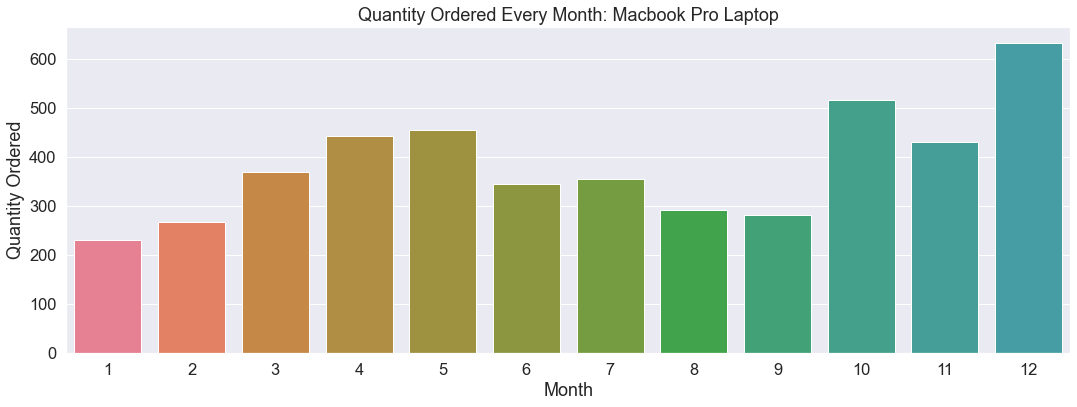

In [10]:
selectQuantityOrderedofproductindifferentmonth(conn)

In [27]:
def selectsaleofmonthaboutproduct(conn):
    """

    """
    month = input("Please input month (1-12):")
    with conn:

        sql = "SELECT Product, sum(Sale) as Total_sale FROM sale WHERE Month = ? GROUP by Product ORDER by Total_sale"
        cur = conn.cursor()
        cur.execute(sql, [month])
        result_set = cur.fetchall()
        month_list = []
        total_sale = []
        for row in result_set:
            month_list.append(row[0])
            total_sale.append(row[1])
            
        fig, ax = plt.subplots(1,1, figsize=(18, 6))
        color = sns.color_palette('husl', 25)
        sns.set(font_scale=1.5) 
        sns.barplot(total_sale, month_list, palette = color,ax=ax)
        ax.set(xlabel='Total Sale', title='Sales of all products in Month' + str(month))

Please input month (1-12):1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


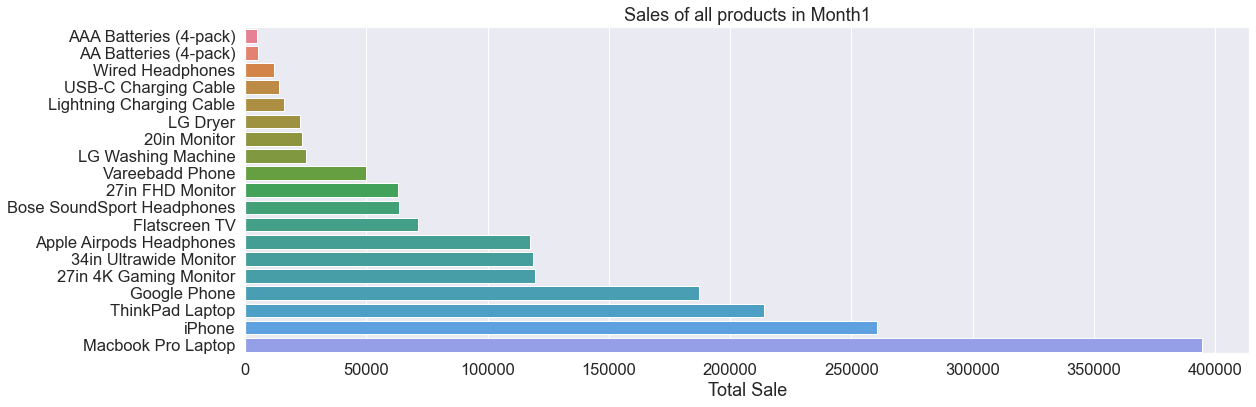

In [28]:
selectsaleofmonthaboutproduct(conn)

In [6]:
def Purchase_Frequencyaboutproductinallmonth(conn):
    """

    """
    product = input("Please input product:")
    with conn:

        sql = "SELECT Month, count(Order_ID) FROM sale WHERE Product = ? GROUP by Month ORDER by Month"
        cur = conn.cursor()
        cur.execute(sql, [product])
        result_set = cur.fetchall()
        month = []
        Purchase_Frequency = []
        for row in result_set:
            month.append(row[0])
            Purchase_Frequency.append(row[1])
            
        fig, ax = plt.subplots(1,1, figsize=(18, 6))
        color = sns.color_palette('husl', 25)
        sns.set(font_scale=1.5) 
        sns.barplot(month, Purchase_Frequency, palette = color,ax=ax)
        ax.set(xlabel='Month', title='Purchase Frequency of ' + product)

Please input product:Macbook Pro Laptop


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


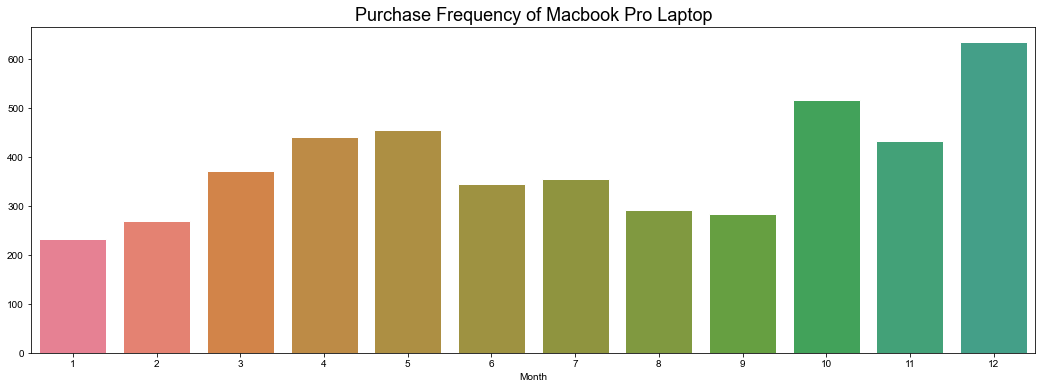

In [7]:
Purchase_Frequencyaboutproductinallmonth(conn)

In [15]:
def Purchase_possibilityaboutproductinmonth(conn):
    """

    """
    product = input("Please input product:")
    month = input("Please input month:")
    with conn:

        sql1 = "SELECT count(Order_ID) FROM sale WHERE Product=? and Month=?"
        cur = conn.cursor()
        cur.execute(sql1, (product, month))
        order_times_product = cur.fetchall()[0][0]
        
        sql2 = "SELECT count(Order_ID) FROM sale WHERE Month=?"
        cur = conn.cursor()
        cur.execute(sql2, [month])
        order_times_all = cur.fetchall()[0][0]
        
        possibility = order_times_product / order_times_all * 100
        
        print( 'In Month '+month+', the possibility of next order which is '+product+' is ' + str(possibility) + '%.')

In [14]:
Purchase_possibilityaboutproductinmonth(conn)

Please input product:Macbook Pro Laptop
Please input month:1
In Month 1, the possibility of next order which is Macbook Pro Laptop is 2.496502744000861%.


In [19]:
def what_is_the_quantity_ordered_per_product_in_2019(conn):
    """

    """
    with conn:

        sql = "SELECT Product, sum(Quantity_Ordered) FROM sale GROUP BY Product"
        cur = conn.cursor()
        cur.execute(sql, )
        result_set = cur.fetchall()
        product = []
        quantity_Ordered = []
        for row in result_set:
            product.append(row[0])
            quantity_Ordered.append(row[1])
        
        fig, ax = plt.subplots(1,1, figsize=(18, 6))
        
        color = sns.color_palette('husl', 25)
        sns.set(font_scale=1.5) 
        sns.barplot(quantity_Ordered, product, palette = color,ax=ax)
        ax.set(xlabel='Quantity Ordered', title='Quantity Ordered Per Product in 2019')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


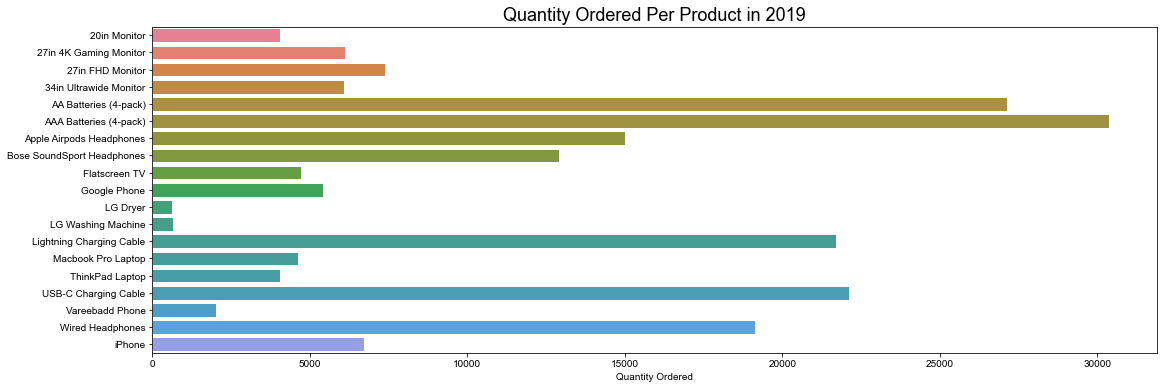

In [20]:
what_is_the_quantity_ordered_per_product_in_2019(conn)

In [21]:
def what_is_sale_situation_in_2019(conn):
    """

    """
    with conn:

        sql = "SELECT Product, sum(Sale) FROM sale GROUP BY Product"
        cur = conn.cursor()
        cur.execute(sql, )
        result_set = cur.fetchall()
        product = []
        sale = []
        for row in result_set:
            product.append(row[0])
            sale.append(row[1])
        
        fig, ax = plt.subplots(1,1, figsize=(18, 6))
        
        color = sns.color_palette('husl', 25)
        sns.set(font_scale=1.5) 
        sns.barplot(sale, product, palette = color,ax=ax)
        ax.set(xlabel='Sales', title='Sales Per Product in 2019')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


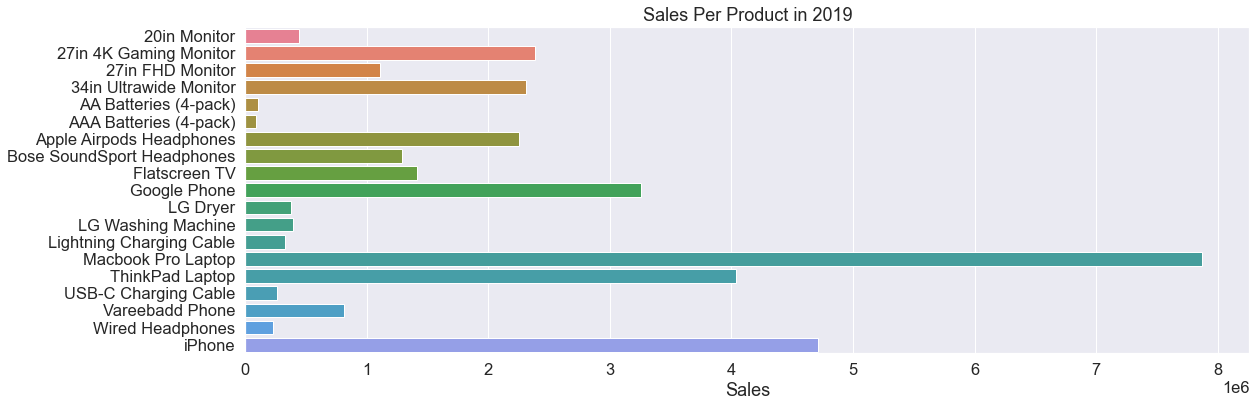

In [22]:
what_is_sale_situation_in_2019(conn)

In [28]:
def what_is_sale_situation_in_all_months(conn):
    """

    """
    with conn:

        sql = "SELECT Product, Month, sum(Sale) FROM sale GROUP BY Month, Product"
        cur = conn.cursor()
        cur.execute(sql, )
        result_set = cur.fetchall()
        product = []
        month = []
        sale = []
        for row in result_set:
            product.append(row[0])
            month.append(row[1])
            sale.append(row[2])
        temp_data = pd.DataFrame(list(zip(month, product, sale)), columns =['Month', 'Product', 'Sale'])
        ax = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
        ax.map(sns.barplot, "Sale", "Product")
        ax.fig.subplots_adjust(top=0.9)
        ax.fig.suptitle('Sales per Product every Month', fontsize=36)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


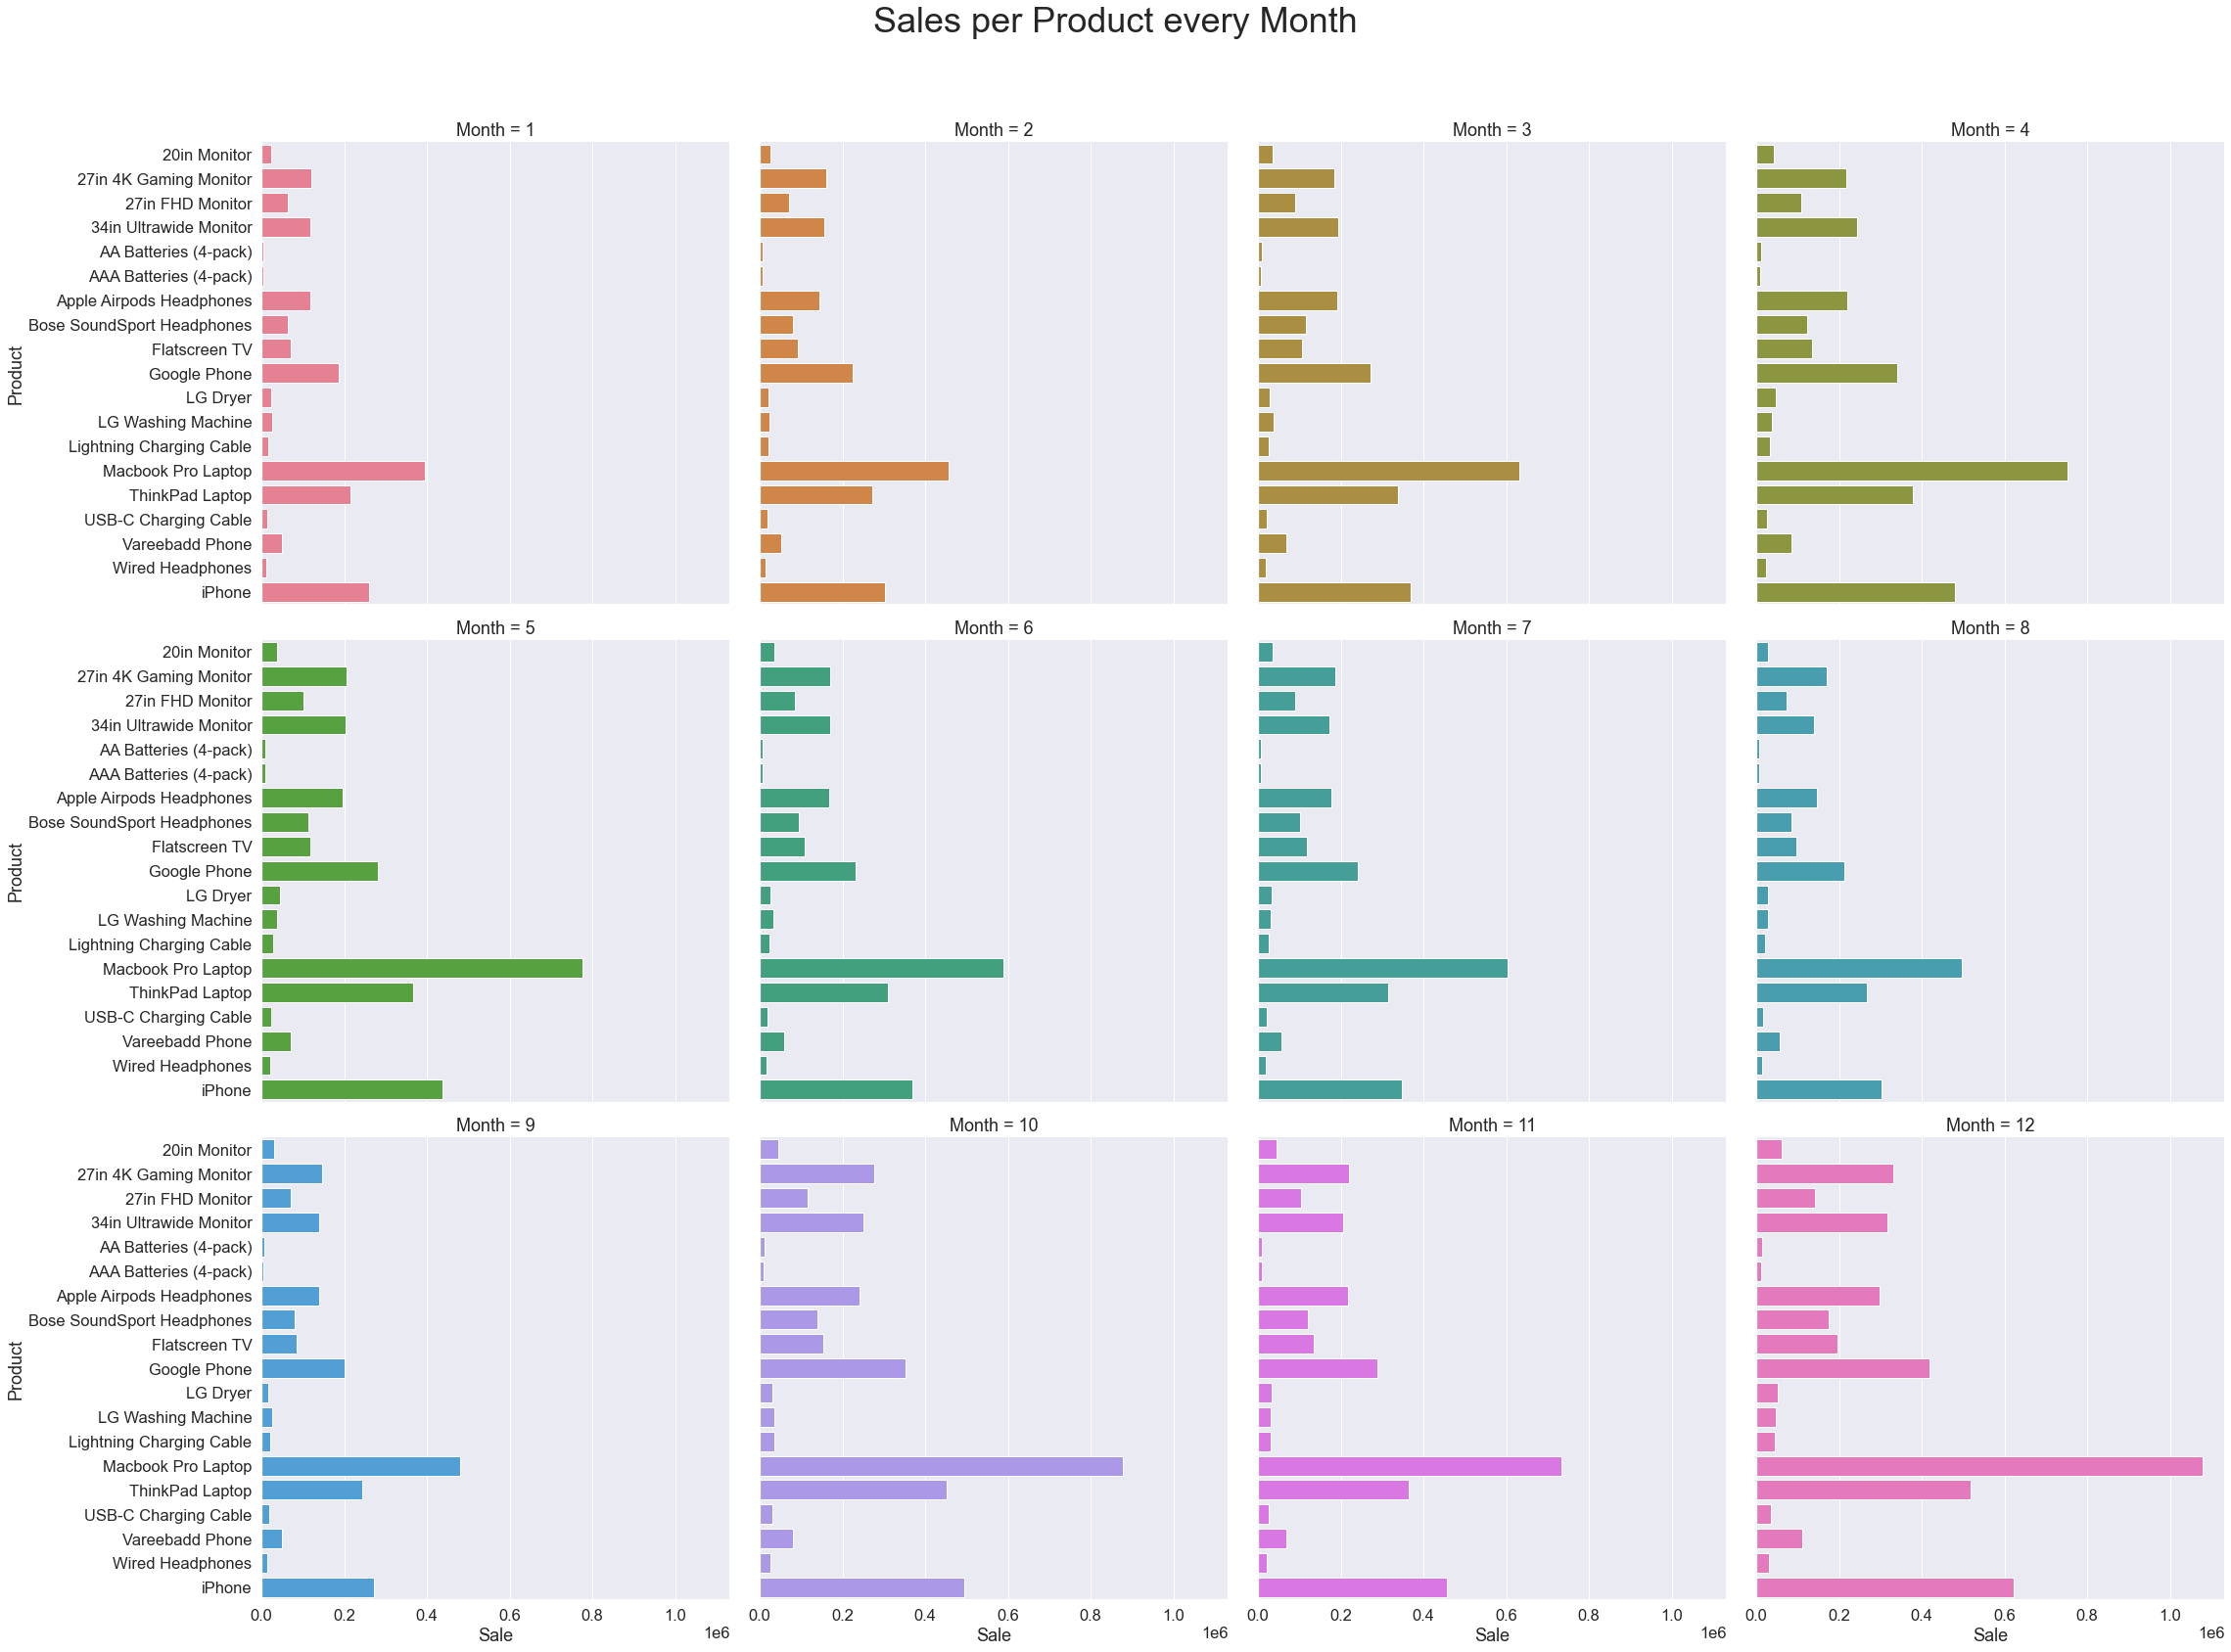

In [29]:
what_is_sale_situation_in_all_months(conn)

In [34]:
def what_is_quatity_ordered_in_all_months(conn):
    """

    """
    with conn:

        sql = "SELECT Product, Month, sum(Quantity_Ordered) FROM sale GROUP BY Month, Product"
        cur = conn.cursor()
        cur.execute(sql, )
        result_set = cur.fetchall()
        product = []
        month = []
        quantity_ordered = []
        for row in result_set:
            product.append(row[0])
            month.append(row[1])
            quantity_ordered.append(row[2])
        temp_data = pd.DataFrame(list(zip(month, product, quantity_ordered)), columns =['Month', 'Product', 'Quantity Ordered'])
        ax = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
        ax.map(sns.barplot, "Quantity Ordered", "Product")
        ax.fig.subplots_adjust(top=0.9)
        ax.fig.suptitle('Quantity Ordered per Product every Month', fontsize=36)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


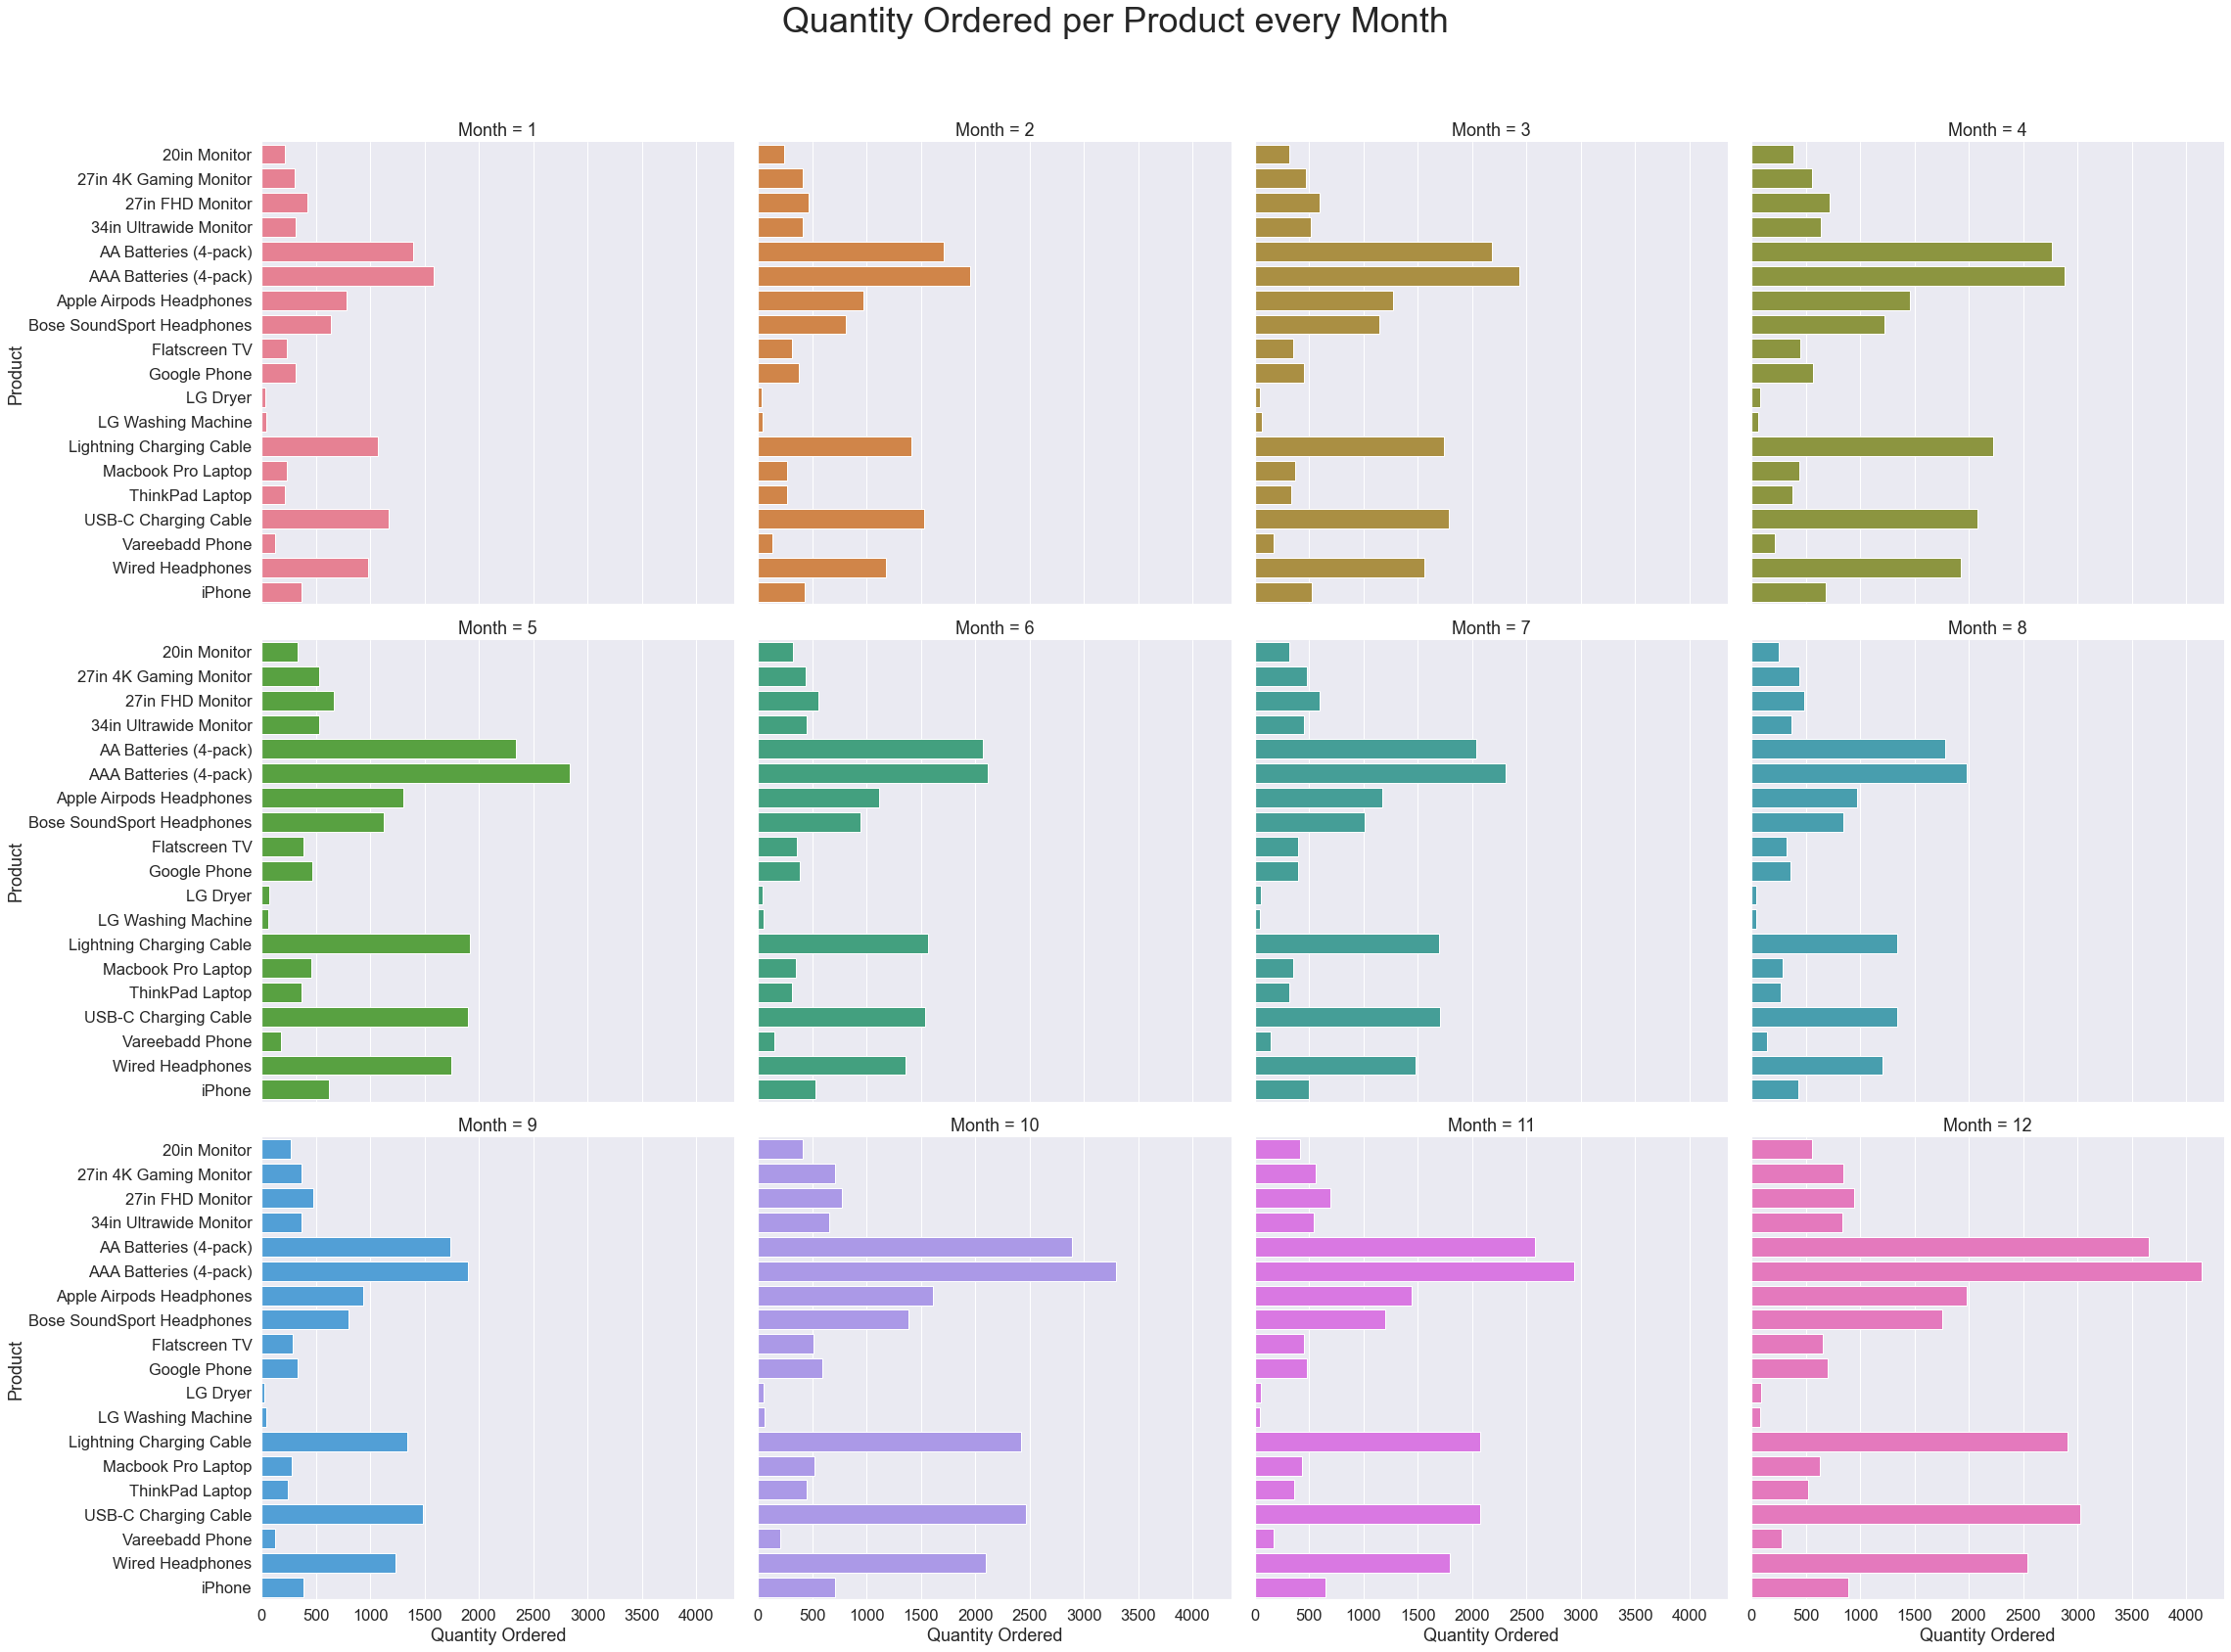

In [35]:
what_is_quatity_ordered_in_all_months(conn)

In [38]:
def what_is_sale_situation_in_all_cities(conn):
    """

    """
    with conn:

        sql = "SELECT Product, City, sum(Sale) FROM sale GROUP BY City, Product"
        cur = conn.cursor()
        cur.execute(sql, )
        result_set = cur.fetchall()
        product = []
        city = []
        sale = []
        for row in result_set:
            product.append(row[0])
            city.append(row[1])
            sale.append(row[2])
        temp_data = pd.DataFrame(list(zip(city, product, sale)), columns =['City', 'Product', 'Sale'])
        ax = sns.FacetGrid(temp_data, col="City", hue='City', col_wrap=4, size=8)
        ax.map(sns.barplot, "Sale", "Product")
        ax.fig.subplots_adjust(top=0.9)
        ax.fig.suptitle('Sales per Product every City', fontsize=36)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


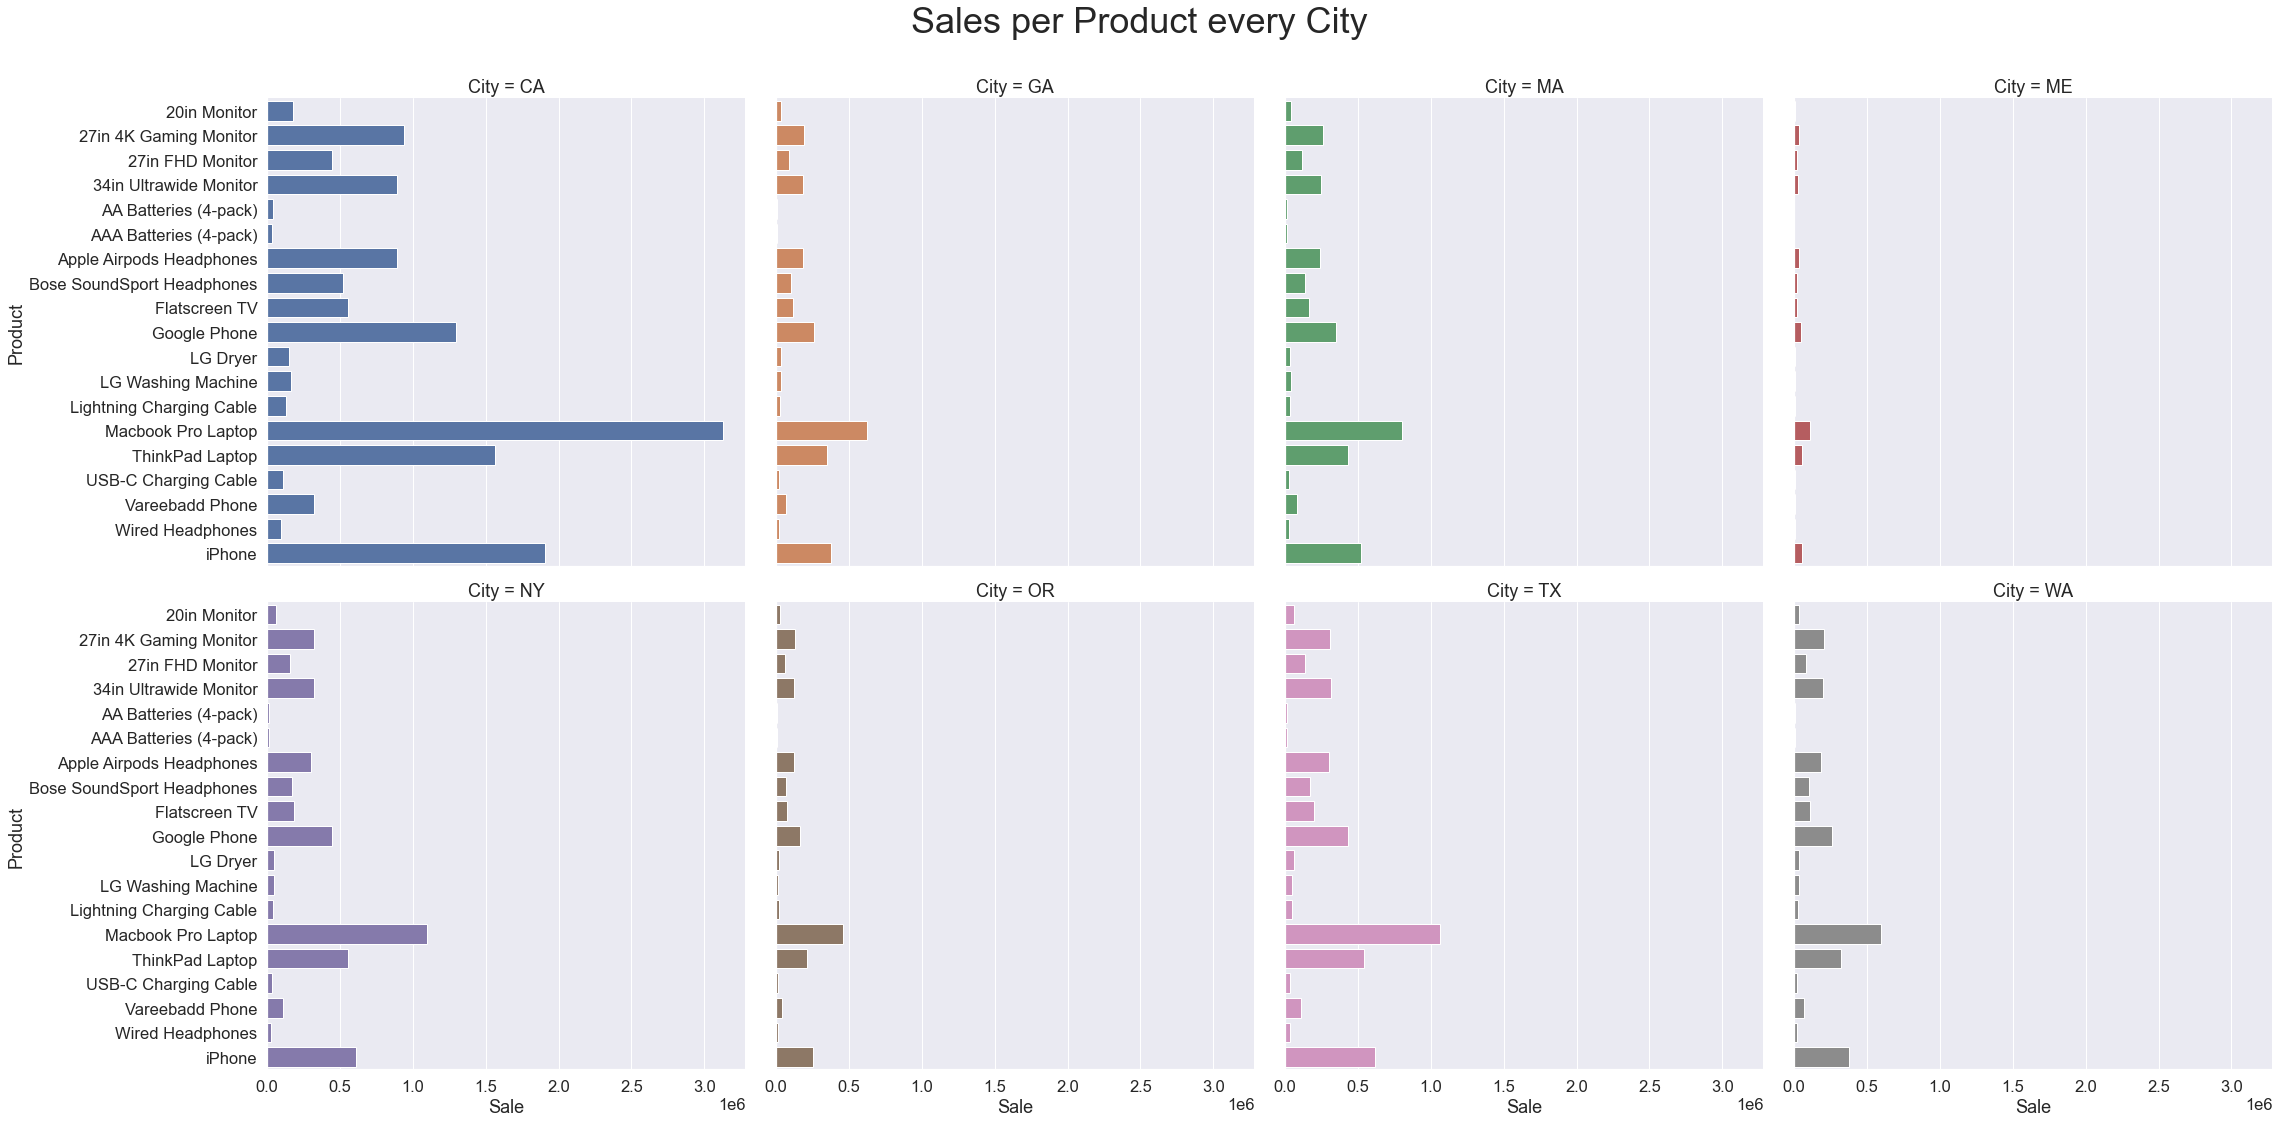

In [39]:
what_is_sale_situation_in_all_cities(conn)